## Location and type of connections

In a fully connected layer NN, each neuron in the current layer is connected to every neuron in the previous layer, and each connection has it's own weight. This is a general purpose connection pattern and makes no assumptions about the features in the input data thus not taking any advantage that the knowledge of the data being used can bring. These types of layers are also very expensive in terms of memory and computation.

In contrast, in a convolutional layer each neuron is only connected to a few nearby local neurons in the previous layer, and the same set of weights is used to connect to them. For example, in the following image, the neurons in the second layer are connected only to some input units (pixels).
      
<center><img src="https://i.stack.imgur.com/NU7y2.png" alt="HTML5 Icon" style="width: 500px; height: 500px;"></center>

## Feature Learning

Feature engineering is the process of extracting useful patterns from input data that will help the prediction model to understand better the real nature of the problem. A good feature learning will present patterns in a way that significantly increase the accuracy and performance of the applied machine learning algorithms in a way that would otherwise be impossible or too expensive by just machine learning itself.

Feature learning algorithms find the common patterns that are important to distinguish between the wanted classes and extract them automatically. After this process, they are ready to be used in a classification or regression problem. 

The great advantage of CNNs is that they are uncommonly good at finding features in images that grow after each level, resulting in high-level features in the end. The final layers (one or more) use all these generated features for classification or regression. 

<center><img src="https://devblogs.nvidia.com/wp-content/uploads/2015/11/hierarchical_features.png" alt="HTML5 Icon" style="width: 650px; height: 250px;"></center>

## Convolution  

Convolution is a mathematical operation that calculates the integral of the product of 2 functions (signals), with one of the signals flipped. For example below we convolve 2 signals $f(t)$ and $g(t)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The example below shows a one-dimensional convolution. Padding the signal with zeros on the left and right controls the size of the output. In addition, using a step size greater than 1 will result in a shorter output.

In [2]:
f = np.array([1, 2, 7, 7, 2, 1, 1]) # our 'image'
g = np.array([1, 4, 1]) # our kernel
print('Expected output:', np.convolve(f,g))

g_inv = np.flip(g, axis=-1) # invert the kernel
f = np.pad(f, len(g)-1, 'constant') # pad left and right side of signal
out = np.zeros(len(f)-len(g)+1)

for i in range(len(f)-len(g)+1):
    out[i] = f[i:i+len(g)] @ g_inv

print(out)

Expected output: [ 1  6 16 37 37 16  7  5  1]
[ 1.  6. 16. 37. 37. 16.  7.  5.  1.]


Note the increase in the 'strength' of the original signal where it was strongest, in effect exaggerating the transition from low to high (and high to low). We can think of a one-dimensional convolution as sliding function (1xn filter) multiplying and adding on top of an one-dimensional array.

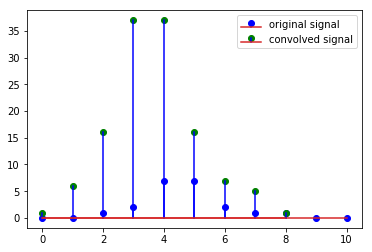

In [3]:
plt.stem(f, 'b', markerfmt='bo', label='original signal')
plt.stem(out, 'b', markerfmt='go', label='convolved signal')
plt.legend();

## Using an Image Filter

The animation below , shows how a two-dimensional convolution operation would operate on the images. This operation is performed in most of the Deep Learning frameworks in their first phase. Here, we are using a sliding window (kernel) to create the convolved matrix. In this particular case, the kernel's size is 3 x 3, the step size is 1 and padding is not used. Note tht the resulting matrix is smaller because padding was not used in the convolution operation.

<center><img src="https://ibm.box.com/shared/static/fvutcm8jwa5j2o7xv2zzqyz2yu3zwhz4.gif" alt="HTML5 Icon" style="width: 450px; height: 300px;"></center> 

The sliding window (a.k.a kernel, filter or feature detector) with a preset calculation ([[x1, x0,x1], [x0,x1,x0], [x1,x0,x1]]) goes through the image and creates a new matrix (feature map). The values from the filter were multiplied element-wise with the original matrix (input image), then summed up.

## Kernels  

Kernels can be used on images for several purposes, such as blurring, denoising and edge detection. The latter is particularly useful in the context of detecting the boundaries of an object. An example is shown below.  

<center><img src="https://i1.wp.com/timdettmers.com/wp-content/uploads/2015/03/convolution.png?resize=500%2C193" alt="HTML5 Icon" style="width:700px;height:350px;"></center>

Taking the values −1 and 8 on two adjacent pixels and zero everywhere else for the kernel, results in the following image. That is, we subtract two adjacent pixels. When side by side pixels are similar, this gives us approximately zero. On edges, however, adjacent pixels are very different in the direction perpendicular to the edge.

## Using Different Paddings with 1D Signals

There are three methods to apply kernel on the matrix, with padding **(full)**, **(same)** and without padding **(valid)**. 

In [4]:
signal = [1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1]
print('Length of input:', len(signal))
kernel = [1,-1,2]

Length of input: 17


In [5]:
conv_signal = np.convolve(signal, kernel, mode='full')
print('Length of output:', len(conv_signal))
print(conv_signal)

Length of output: 19
[ 1  1  3  5  7  9 11 13 15 15 17 15 13 11  9  7  5  3  2]


In [6]:
conv_signal = np.convolve(signal, kernel, mode='same')
print('Length of output:', len(conv_signal))
print(conv_signal)

Length of output: 17
[ 1  3  5  7  9 11 13 15 15 17 15 13 11  9  7  5  3]


In [7]:
conv_signal = np.convolve(signal, kernel, mode='valid')
print('Length of output:', len(conv_signal))
print(conv_signal)

Length of output: 15
[ 3  5  7  9 11 13 15 15 17 15 13 11  9  7  5]


## Convolution with 2D Matrices

Remember that the kernel is inverted.

In [8]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1, 1]]

print('Without zero padding \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print('With zero padding \n')
print(sg.convolve( I, g, 'same'))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4]
 [-212  -28  236]
 [-218    2  -14]]


In [9]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding _same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding _same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


## Using with TensorFlow

TensorFlow does the same work as Numpy, but instead of returning to Python everytime, it creates all the operations in the form of graphs and executes them once with the highly optimized backend.

Suppose that you have two tensors:

* 3x3 filter (4D tensor = [3,3,1,1] = [width, height, channels, number of filters])
* 10x10 image (4D tensor = [1,10,10,1] = [batch size, width, height, number of channels]

In [10]:
import tensorflow as tf

#Building graph
input = tf.Variable(tf.random_normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random_normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

#Initialization and session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    print('Shape of input:', input.shape)
    result = sess.run(op)
    print('Shape of output with valid padding:', result.shape)
    result2 = sess.run(op2)
    print('Shape of output with same padding:', result2.shape)
    
    #print("Input \n")
    #print('{0} \n'.format(input.eval()))
    #print("Filter/Kernel \n")
    #print('{0} \n'.format(filter.eval()))
    #print("Result/Feature Map with valid positions \n")
    #result = sess.run(op)
    #print(result)
    #print('\n')
    #print("Result/Feature Map with padding \n")
    #result2 = sess.run(op2)
    #print(result2)

Shape of input: (1, 10, 10, 1)
Shape of output with valid padding: (1, 8, 8, 1)
Shape of output with same padding: (1, 10, 10, 1)


<hr>

## Convolution Applied on Images


 Input image converted to gray scale: 



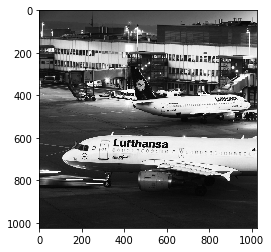

In [11]:
from scipy import misc
from PIL import Image

im = Image.open('data/lufthansa.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform
#print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
#print("After conversion to numerical representation: \n\n %r" % arr) 
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Applying a kernel to detect edges.

In [12]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = sg.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


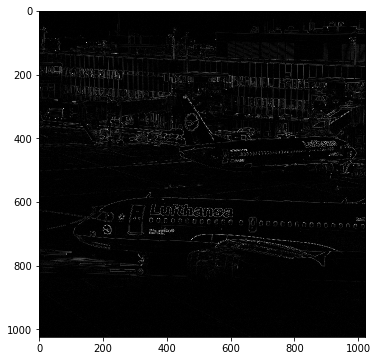

In [13]:
print('GRADIENT MAGNITUDE - Feature map')
fig, aux = plt.subplots(figsize=(6, 6))
aux.imshow(np.absolute(grad), cmap='gray');

If we change the kernel and start to analyze the outputs we would be acting as a CNN. The difference is that a Neural Network do all this work automatically (the kernel adjustment using different weights). In addition, we can understand how biases affect the behaviour of feature maps. In addition, pixel values are usually converted to a range from 0 to 1 (normalization).

GRADIENT MAGNITUDE - Feature map


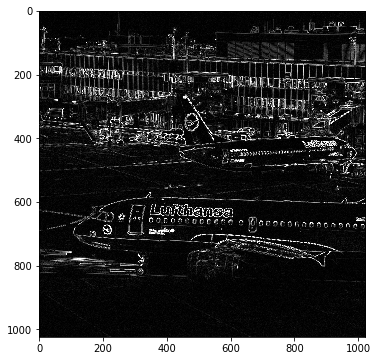

In [14]:
grad_biases = np.absolute(grad) + 100
grad_biases[grad_biases > 255] = 255

print('GRADIENT MAGNITUDE - Feature map')
fig, aux = plt.subplots(figsize=(6, 6))
aux.imshow(np.absolute(grad_biases), cmap='gray')